# Chapter 4 Labs

## 4.6.1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Storing data
data = pd.read_csv(r'./Data Sets/Smarket.csv')

In [3]:
# Viewing data format
data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [4]:
# Correlations Matrix
data.loc[:, data.columns != 'Direction'].corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


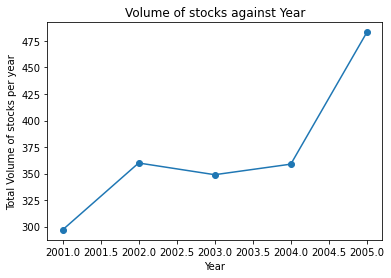

In [5]:
# Plotting 'Volume' of stocks against 'Year'
fig = plt.figure()
ax = plt.axes()
plt.plot(data.groupby('Year').sum().index, data.groupby('Year').sum()['Volume'], marker='o')
plt.title('Volume of stocks against Year')
plt.xlabel('Year')
plt.ylabel('Total Volume of stocks per year');

## 4.6.2

In [6]:
# Seperating target and features
x = data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = data['Direction']

In [7]:
# Importing Logistic Regression model
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()

In [8]:
# Fitting the model
model = logReg.fit(x, y)

In [9]:
# Displaying classes in the data
print('Classes are: ', model.classes_)

# Displaying coefficients of the features in the fitted model
print('\n', pd.DataFrame(model.coef_, columns=['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume'], index=['Coffecients']))

Classes are:  ['Down' 'Up']

                  Lag1      Lag2      Lag3      Lag4      Lag5    Volume
Coffecients -0.072843 -0.042235  0.011016  0.009284  0.010264  0.132112


In [10]:
# Storing predictions as probabilties
predictions_proba = logReg.predict_proba(x)

# Storing predictions as classes
predictions_classes = logReg.predict(x)

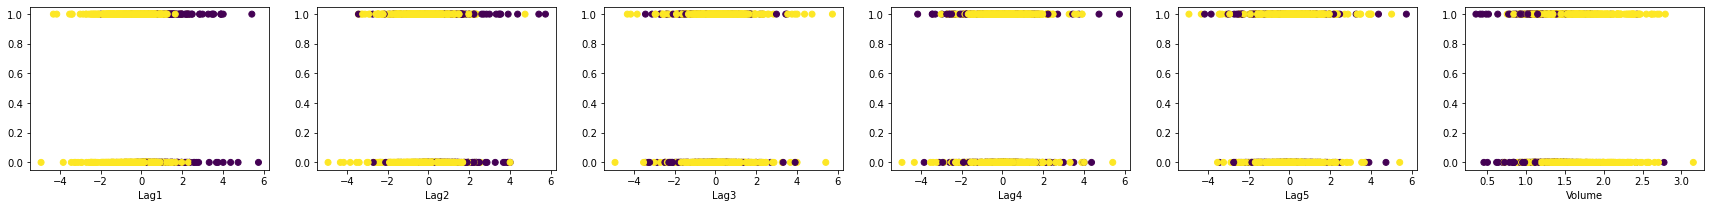

In [11]:
fig, ax = plt.subplots(1, 6, figsize=(30,3))
ax[0].scatter(x['Lag1'], y.map({'Up':1, 'Down':0}), c=pd.Series(predictions_classes).map({'Up':1, 'Down':0}))
ax[0].set_xlabel('Lag1')
ax[1].scatter(x['Lag2'], y.map({'Up':1, 'Down':0}), c=pd.Series(predictions_classes).map({'Up':1, 'Down':0}))
ax[1].set_xlabel('Lag2')
ax[2].scatter(x['Lag3'], y.map({'Up':1, 'Down':0}), c=pd.Series(predictions_classes).map({'Up':1, 'Down':0}))
ax[2].set_xlabel('Lag3')
ax[3].scatter(x['Lag4'], y.map({'Up':1, 'Down':0}), c=pd.Series(predictions_classes).map({'Up':1, 'Down':0}))
ax[3].set_xlabel('Lag4')
ax[4].scatter(x['Lag5'], y.map({'Up':1, 'Down':0}), c=pd.Series(predictions_classes).map({'Up':1, 'Down':0}))
ax[4].set_xlabel('Lag5')
ax[5].scatter(x['Volume'], y.map({'Up':1, 'Down':0}), c=pd.Series(predictions_classes).map({'Up':1, 'Down':0}))
ax[5].set_xlabel('Volume');

In [12]:
# Using Statsmodels
import statsmodels.api as sm
logReg_sm = sm.Logit(y.map({'Up':1, 'Down':0}), sm.add_constant(x))

# Fitting the data using Logit from Statsmodels
result = logReg_sm.fit()

# Printing the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Wed, 28 Apr 2021   Pseudo R-squ.:                0.002074
Time:                        16:49:42   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.

In [13]:
# 10 predicted probabilties
print('First 10 predicted probabilties of "Down":')
print(predictions_proba[:10, 0])

First 10 predicted probabilties of "Down":
[0.49265655 0.51825557 0.51870199 0.48465057 0.48900868 0.49293516
 0.50725062 0.49072089 0.48216707 0.51090531]


In [14]:
# Generating the Confusion Matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_true = y, y_pred = predictions_classes, labels=['Down', 'Up'])
pd.DataFrame(cm, columns=['Predicted Down', 'Predicted Up'], index=['True Down', 'True Up'])

,Predicted Down,Predicted Up
True Down,144,458
True Up,141,507


In [15]:
# Calculating error rate
train_error_rate = 100 - ((cm[0,0] + cm[1,1]) / np.sum(cm))*100
print('Market movement is correctly predicted {} % of the time'.format(round(100 - train_error_rate, 2)))

Market movement is correctly predicted 52.08 % of the time


In [16]:
# Seperating training data and test data
data_train = data[data['Year'] < 2005]
data_test = data[data['Year'] == 2005]

# Seperating target and features
x_train = data_train[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y_train = data_train['Direction']
x_test = data_test[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y_test = data_test['Direction']

In [17]:
# Fitting model on training data
logReg_new = LogisticRegression()
model_new = logReg_new.fit(x_train, y_train)

# Predicting probabilities of Target in test data
predictions_proba_new = logReg_new.predict_proba(x_test)
predictions_classes_new = logReg_new.predict(x_test)

In [18]:
# Generating the new Confusion Matrix
cm_new = metrics.confusion_matrix(y_true=y_test, y_pred=predictions_classes_new, labels=['Down', 'Up'])
pd.DataFrame(cm_new, columns=['Predicted Down', 'Predicted Up'], index=['True Down', 'True Up'])

,Predicted Down,Predicted Up
True Down,74,37
True Up,93,48


In [19]:
# Calculating new error rate
train_error_rate_new = 100 - ((cm_new[0,0] + cm_new[1,1]) / np.sum(cm_new))*100
print('Market movement is correctly predicted {} % of the time'.format(round(100 - train_error_rate_new, 2)))

Market movement is correctly predicted 48.41 % of the time


In [20]:
# Training on smaller model including only Lag1 and Lag2

# Fitting model on training data
logReg_new_small = LogisticRegression()
model_new_small = logReg_new_small.fit(x_train[['Lag1', 'Lag2']], y_train)

# Predicting probabilities of Target in test data
predictions_proba_new_small = logReg_new_small.predict_proba(x_test[['Lag1', 'Lag2']])
predictions_classes_new_small = logReg_new_small.predict(x_test[['Lag1', 'Lag2']])

In [21]:
# Generating the new Confusion Matrix for smaller features
cm_new_small = metrics.confusion_matrix(y_true=y_test, y_pred=predictions_classes_new_small, labels=['Down', 'Up'])
pd.DataFrame(cm_new_small, columns=['Predicted Down', 'Predicted Up'], index=['True Down', 'True Up'])

,Predicted Down,Predicted Up
True Down,35,76
True Up,35,106


In [22]:
# Calculating new error rate for smaller features
train_error_rate_new_small = 100 - ((cm_new_small[0,0] + cm_new_small[1,1]) / np.sum(cm_new_small))*100
print('Market movement is correctly predicted {} % of the time'.format(round(100 - train_error_rate_new_small, 2)))

Market movement is correctly predicted 55.95 % of the time


## 4.6.3

In [23]:
import sklearn.discriminant_analysis as da

In [24]:
# Seperating training data and test data
data_train = data[data['Year'] < 2005]
data_test = data[data['Year'] == 2005]

# Seperating target and features
x_train = data_train[['Lag1', 'Lag2']]
y_train = data_train['Direction']
x_test = data_test[['Lag1', 'Lag2']]
y_test = data_test['Direction']

In [25]:
lda = da.LinearDiscriminantAnalysis()
model = lda.fit(x_train, y_train)

In [26]:
# Displaying classes in the data
print('Classes are: ', model.classes_)

# Displaying prior probabilities of classes in the fitted model
print('\n', pd.DataFrame(model.priors_.reshape(-1,2), columns=model.classes_, index=['Prior Probabilities:']))

# Displaying class-wise means in the fitted model
print('\nClass-wise Means:\n', pd.DataFrame(model.means_, columns=['Lag1', 'Lag2'], index=model.classes_))

# Displaying coefficients of linear discriminants in the fitted model
print('\n', pd.DataFrame(model.coef_, columns=['Lag1', 'Lag2'], index=['Coefficients:']))

Classes are:  ['Down' 'Up']

                           Down        Up
Prior Probabilities:  0.491984  0.508016

Class-wise Means:
           Lag1      Lag2
Down  0.042790  0.033894
Up   -0.039546 -0.031325

                    Lag1      Lag2
Coefficients: -0.055441 -0.044345


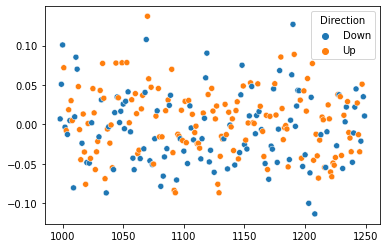

In [27]:
sns.scatterplot(x_test.index, (model.coef_[0,0]*x_test.values[:, 0]) + (model.coef_[0,1]*x_test.values[:, 1]), 
            hue=y_test);

In [28]:
# Storing predictions as probabilties
predictions_proba = lda.predict_proba(x_test)

# Storing predictions as classes
predictions_classes = lda.predict(x_test)

In [29]:
cm = metrics.confusion_matrix(y_true = y_test, y_pred = predictions_classes, labels=['Down', 'Up'])
pd.DataFrame(cm, columns=['Predicted Down', 'Predicted Up'], index=['True Down', 'True Up'])

,Predicted Down,Predicted Up
True Down,35,76
True Up,35,106


In [30]:
# Calculating error rate
train_error_rate = 100 - ((cm[0,0] + cm[1,1]) / np.sum(cm))*100
print('Market movement is correctly predicted {} % of the time'.format(round(100 - train_error_rate, 2)))

Market movement is correctly predicted 55.95 % of the time


In [31]:
# Calculating number of days when market will decrease with threshold = 0.9
print('Number of days where there is a 90% chance that market will decrease: ', np.sum(predictions_proba[:, 0] > 0.9))

Number of days where there is a 90% chance that market will decrease:  0


## 4.6.4

In [32]:
import sklearn.discriminant_analysis as da

In [33]:
# Seperating training data and test data
data_train = data[data['Year'] < 2005]
data_test = data[data['Year'] == 2005]

# Seperating target and features
x_train = data_train[['Lag1', 'Lag2']]
y_train = data_train['Direction']
x_test = data_test[['Lag1', 'Lag2']]
y_test = data_test['Direction']

In [34]:
qda = da.QuadraticDiscriminantAnalysis()
model = qda.fit(x_train, y_train)

In [35]:
# Storing predictions as probabilties
predictions_proba = qda.predict_proba(x_test)

# Storing predictions as classes
predictions_classes = qda.predict(x_test)

In [36]:
cm = metrics.confusion_matrix(y_true = y_test, y_pred = predictions_classes, labels=['Down', 'Up'])
pd.DataFrame(cm, columns=['Predicted Down', 'Predicted Up'], index=['True Down', 'True Up'])

,Predicted Down,Predicted Up
True Down,30,81
True Up,20,121


In [37]:
# Calculating error rate
train_error_rate = 100 - ((cm[0,0] + cm[1,1]) / np.sum(cm))*100
print('Market movement is correctly predicted {} % of the time'.format(round(100 - train_error_rate, 2)))

Market movement is correctly predicted 59.92 % of the time


## 4.6.5

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
# Seperating training data and test data
data_train = data[data['Year'] < 2005]
data_test = data[data['Year'] == 2005]

# Seperating target and features
x_train = data_train[['Lag1', 'Lag2']]
y_train = data_train['Direction']
x_test = data_test[['Lag1', 'Lag2']]
y_test = data_test['Direction']

In [40]:
# Create KNN classifier with K=1
knn = KNeighborsClassifier(n_neighbors = 1)
# Fit the classifier to the data
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [41]:
# Storing predictions as probabilties
predictions_proba = knn.predict_proba(x_test)

# Storing predictions as classes
predictions_classes = knn.predict(x_test)

In [42]:
cm = metrics.confusion_matrix(y_true = y_test, y_pred = predictions_classes, labels=['Down', 'Up'])
pd.DataFrame(cm, columns=['Predicted Down', 'Predicted Up'], index=['True Down', 'True Up'])

,Predicted Down,Predicted Up
True Down,43,68
True Up,58,83


In [43]:
# Calculating error rate
train_error_rate = 100 - ((cm[0,0] + cm[1,1]) / np.sum(cm))*100
print('Market movement is correctly predicted {} % of the time'.format(round(100 - train_error_rate, 2)))

Market movement is correctly predicted 50.0 % of the time


In [44]:
# Create KNN classifier with K=3
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
# Storing predictions as probabilties
predictions_proba = knn.predict_proba(x_test)

# Storing predictions as classes
predictions_classes = knn.predict(x_test)

In [46]:
cm = metrics.confusion_matrix(y_true = y_test, y_pred = predictions_classes, labels=['Down', 'Up'])
pd.DataFrame(cm, columns=['Predicted Down', 'Predicted Up'], index=['True Down', 'True Up'])

,Predicted Down,Predicted Up
True Down,48,63
True Up,55,86


In [47]:
# Calculating error rate
train_error_rate = 100 - ((cm[0,0] + cm[1,1]) / np.sum(cm))*100
print('Market movement is correctly predicted {} % of the time'.format(round(100 - train_error_rate, 2)))

Market movement is correctly predicted 53.17 % of the time


## 4.6.6

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [49]:
# Storing data
data = pd.read_csv(r'./Data Sets/Caravan.csv')

In [50]:
# Viewing data format
data.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [51]:
from sklearn import preprocessing

# Seperating target and features
x = preprocessing.scale(data.loc[:, data.columns != 'Purchase'])
y = data['Purchase']

In [52]:
# Seperating training and test data
x_train = x[1000:, :]
x_test = x[:1000, :]
y_train = y[1000:]
y_test = y[:1000]

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
# Create KNN classifier with K=1
knn = KNeighborsClassifier(n_neighbors = 1)
# Fit the classifier to the data
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [55]:
# Storing predictions as probabilties
predictions_proba = knn.predict_proba(x_test)

# Storing predictions as classes
predictions_classes = knn.predict(x_test)

In [56]:
cm = metrics.confusion_matrix(y_true = y_test, y_pred = predictions_classes, labels=['No', 'Yes'])
pd.DataFrame(cm, columns=['Predicted No', 'Predicted Yes'], index=['True No', 'True Yes'])

,Predicted No,Predicted Yes
True No,873,68
True Yes,50,9


In [57]:
# Calculating error rate
train_error_rate = 100 - ((cm[0,0] + cm[1,1]) / np.sum(cm))*100
print('Insurance purchase is correctly predicted {} % of the time'.format(round(100 - train_error_rate, 2)))

Insurance purchase is correctly predicted 88.2 % of the time


In [58]:
print('Total percentage of people who buy the insurance is 6%')
print('Percentage of people who buy the insurance among the predicted Yes category is {}%'.
      format(round((cm[1,1] / np.sum(cm[:, 1]))*100, 2)))

Total percentage of people who buy the insurance is 6%
Percentage of people who buy the insurance among the predicted Yes category is 11.69%


In [59]:
# Create KNN classifier with K=5
knn = KNeighborsClassifier(n_neighbors = 5)
# Fit the classifier to the data
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [60]:
# Storing predictions as probabilties
predictions_proba = knn.predict_proba(x_test)

# Storing predictions as classes
predictions_classes = knn.predict(x_test)

In [61]:
cm = metrics.confusion_matrix(y_true = y_test, y_pred = predictions_classes, labels=['No', 'Yes'])
pd.DataFrame(cm, columns=['Predicted No', 'Predicted Yes'], index=['True No', 'True Yes'])

,Predicted No,Predicted Yes
True No,930,11
True Yes,55,4


In [62]:
# Calculating error rate
train_error_rate = 100 - ((cm[0,0] + cm[1,1]) / np.sum(cm))*100
print('Insurance purchase is correctly predicted {} % of the time'.format(round(100 - train_error_rate, 2)))

Insurance purchase is correctly predicted 93.4 % of the time


In [63]:
print('Total percentage of people who buy the insurance is 6%')
print('Percentage of people who buy the insurance among the predicted Yes category is {}%'.
      format(round((cm[1,1] / np.sum(cm[:, 1]))*100, 2)))

Total percentage of people who buy the insurance is 6%
Percentage of people who buy the insurance among the predicted Yes category is 26.67%


In [64]:
# Importing Logistic Regression model
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()

In [65]:
x = data.loc[:, data.columns != 'Purchase']
y = data['Purchase']

In [66]:
# Seperating training and test data
x_train = x.loc[1000:, :]
x_test = x.loc[:999, :]
y_train = y[1000:]
y_test = y[:1000]

In [67]:
# Fitting the model
model = logReg.fit(x_train, y_train)

In [68]:
# Storing predictions as probabilties
predictions_proba = logReg.predict_proba(x_test)[:, 1]

In [69]:
# Storing predictions as classes with threshold as 0.5
predictions_classes_1 = ['Yes' if x>0.5 else 'No' for x in predictions_proba]
# Generating the Confusion Matrix with threshold as 0.5
cm = metrics.confusion_matrix(y_true = y_test, y_pred = predictions_classes_1, labels=['No', 'Yes'])
pd.DataFrame(cm, columns=['Predicted No', 'Predicted Yes'], index=['True No', 'True Yes'])

,Predicted No,Predicted Yes
True No,939,2
True Yes,59,0


In [70]:
# Storing predictions as classes with threshold as 0.25
predictions_classes_2 = ['Yes' if x>0.25 else 'No' for x in predictions_proba]
# Generating the Confusion Matrix with threshold as 0.25
cm = metrics.confusion_matrix(y_true = y_test, y_pred = predictions_classes_2, labels=['No', 'Yes'])
pd.DataFrame(cm, columns=['Predicted No', 'Predicted Yes'], index=['True No', 'True Yes'])

,Predicted No,Predicted Yes
True No,921,20
True Yes,52,7
